In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold

import seaborn as sns

seed=2524541

np.random.seed(seed)

In [49]:
# Import Dataset
components = pd.read_csv('components.csv', header = None, sep=' ')
spectra = pd.read_csv('spectra.csv',header=None, sep=' ')
temperatures = pd.read_csv('temperatures.csv',header=None)

## Part 1.1.1

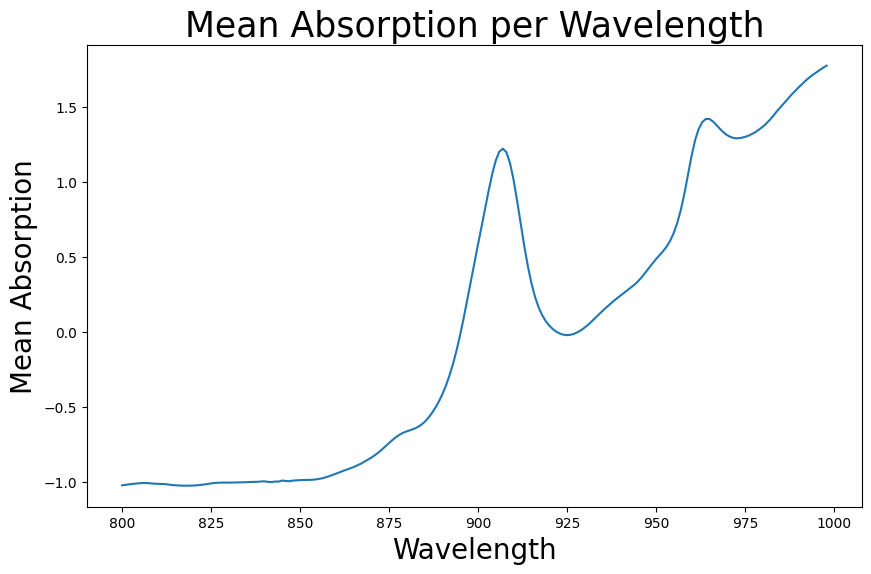

In [3]:
plt.plot(np.mean(spectra, axis=0))

plt.title('Mean Absorption per Wavelength', size = 25)

plt.ylabel('Mean Absorption', size =20)

plt.xlabel('Wavelength', size = 20)

step = 25
original_indices = np.arange(0, 201, step)
mapped_indices = original_indices + 800  

plt.xticks(ticks=original_indices, labels=mapped_indices)  

plt.gcf().set_size_inches(10, 6)

plt.savefig('Q1_analysis_1.png', dpi=600, bbox_inches='tight')

plt.show()


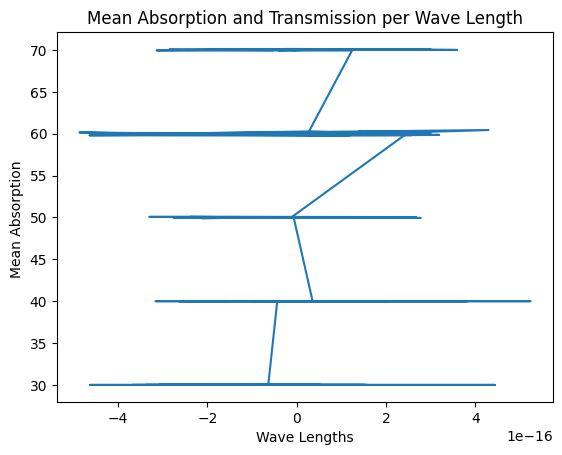

In [4]:
plt.plot(np.mean(spectra, axis=1),temperatures)

plt.title('Mean Absorption and Transmission per Wave Length')

plt.ylabel('Mean Absorption ')

plt.xlabel('Wave Lengths')

plt.savefig('Q1_analysis_1.png', dpi=600, bbox_inches='tight')

plt.show()

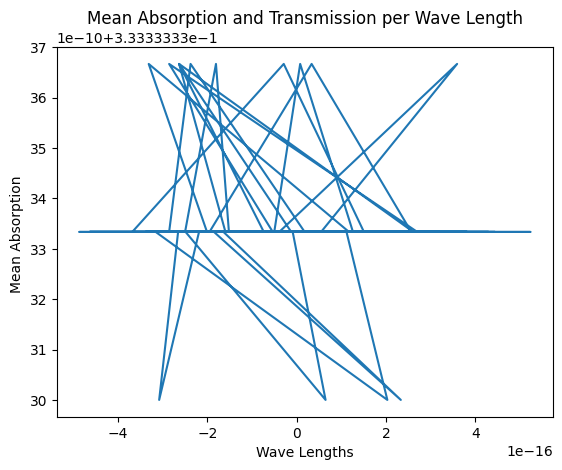

In [133]:
plt.plot(np.mean(spectra, axis=1),np.mean(components,axis=1))

plt.title('Mean Absorption and Transmission per Wave Length')

plt.ylabel('Mean Absorption ')

plt.xlabel('Wave Lengths')

plt.savefig('Q1_analysis_1.png', dpi=600, bbox_inches='tight')

plt.show()

In [70]:
names = ["water", "ethanol", "2-propanol"]
for i in range(3):
    print(f"The Correlation Coefficient between components {names[i]} and absorption is",
          np.corrcoef(np.mean(spectra,axis=1),components[1])[0][1])
print(f"The Correlation Coefficient between temperature {names[i]} and absorption is",
          np.corrcoef(np.mean(spectra,axis=1),temperatures[0])[0][1])

The Correlation Coefficient between components water and absorption is 0.005536461563071538
The Correlation Coefficient between components ethanol and absorption is 0.005536461563071538
The Correlation Coefficient between components 2-propanol and absorption is 0.005536461563071538
The Correlation Coefficient between temperature 2-propanol and absorption is 0.16450734222014263


## Part 1.1.2

In [50]:
# Import hierarchical cluster packages need
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

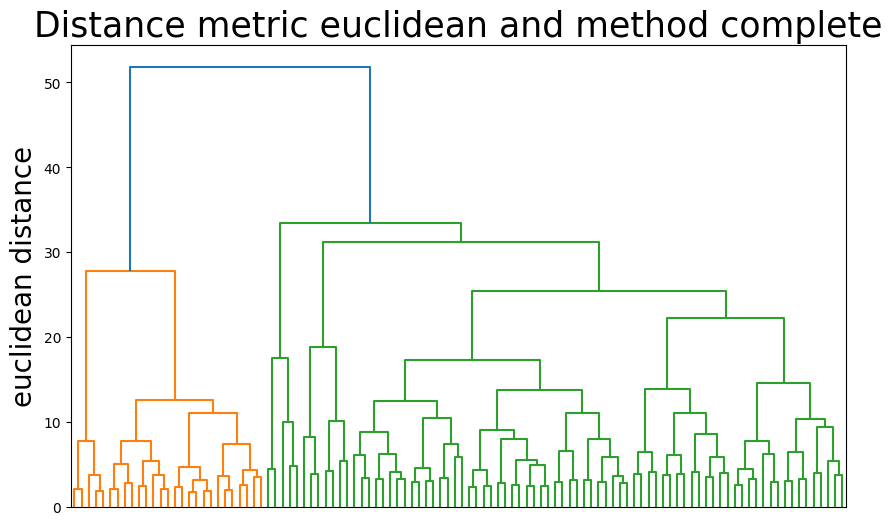

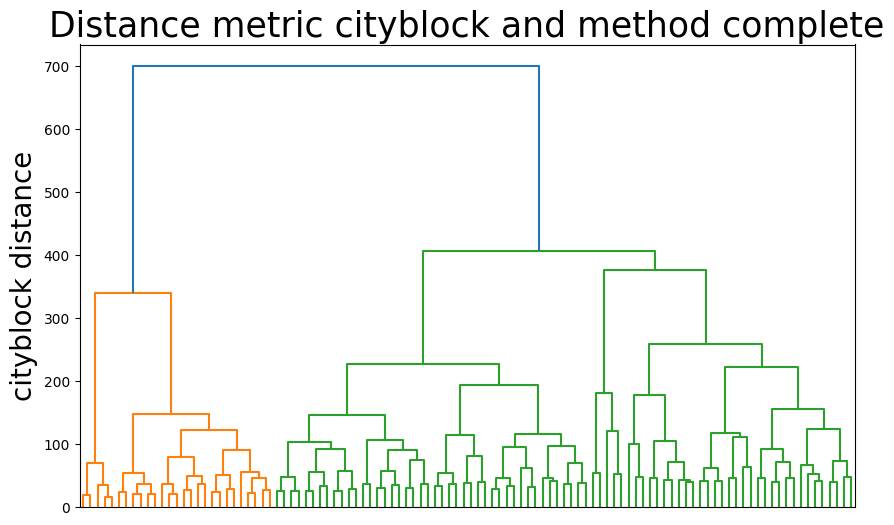

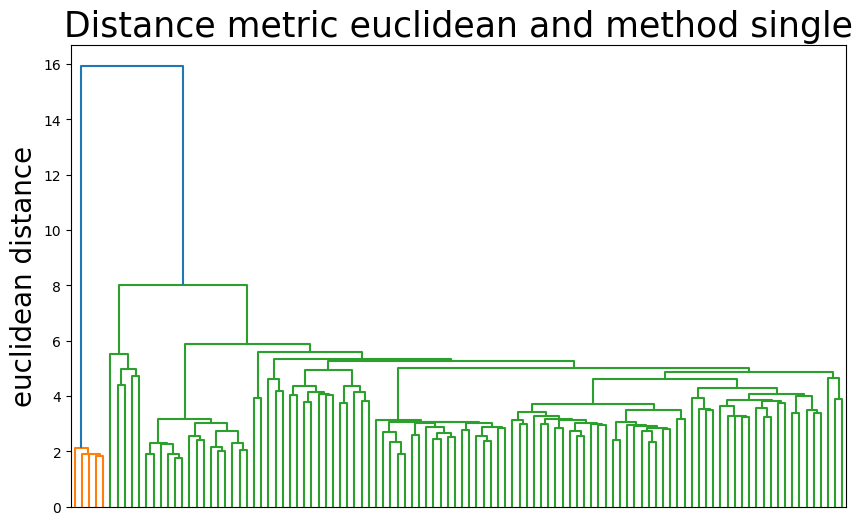

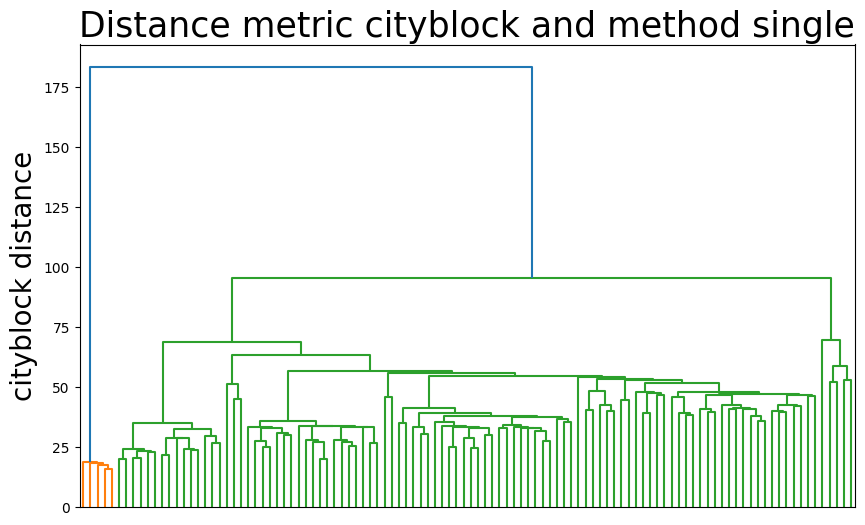

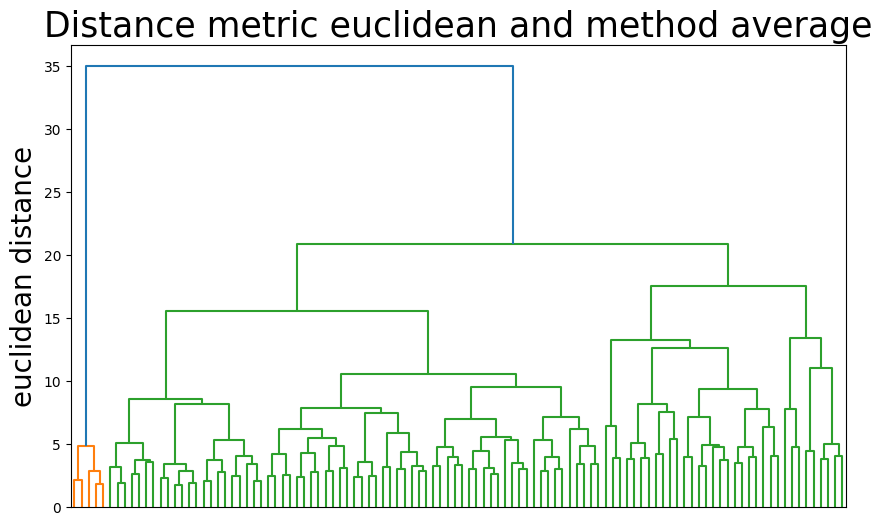

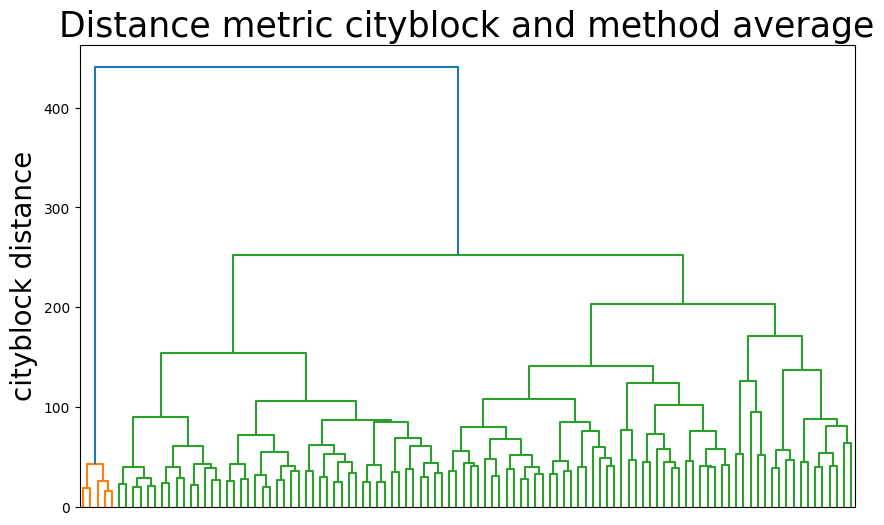

In [51]:
# standardized the spectra values
standardized_spectra = (spectra - spectra.mean()) / spectra.std()

# Define the metrics
Metrics = ["euclidean", "cityblock"]
Methods = ["complete", "single", "average"]

# Plot all hierarchical clusters
for method in Methods:
    for metric in Metrics:
        fig, axes = plt.subplots(figsize=(10, 6))  
        # Get linkage data for each method and metric
        linkage_data = linkage(standardized_spectra, method=method, metric=metric)
        dendrogram(linkage_data, ax=axes)
        # remove x values 
        axes.set_xticklabels([])
        # Set titles
        axes.set_title(f"Distance metric {metric} and method {method}", size=25)
        axes.set_ylabel(f'{metric} distance', size=20) 
        fig.savefig(f"Q1b_{method}_{metric}.png", dpi=600)

In [63]:
# Linkage data with method='complete' and metric='euclidean'
linkage_data = linkage(standardized_spectra, method='complete', metric='euclidean')
cluster_labels = fcluster(linkage_data, t=4, criterion='maxclust')  

for i in range(1,5):
    components_values = components.iloc[cluster_labels==i].mean()
    print(f"Group {i}")
    print("Water Mean", components_values[0])
    print("Ethanol Mean", components_values[1])
    print("2-propanol Mean", components_values[2])
    print("Temperatures Mean",temperatures.iloc[cluster_labels==i].mean())
    print('-----------------------------------------------------------------')

Group 1
Water Mean 0.15421671240740742
Ethanol Mean 0.6853156876666666
2-propanol Mean 0.16046760007407407
Temperatures Mean 0    54.1
dtype: float64
-----------------------------------------------------------------
Group 2
Water Mean 0.0
Ethanol Mean 0.0
2-propanol Mean 1.0
Temperatures Mean 0    50.018
dtype: float64
-----------------------------------------------------------------
Group 3
Water Mean 0.7382706687142857
Ethanol Mean 0.0
2-propanol Mean 0.2617293312857143
Temperatures Mean 0    35.714286
dtype: float64
-----------------------------------------------------------------
Group 4
Water Mean 0.3856785410724638
Ethanol Mean 0.25329502837681156
2-propanol Mean 0.3610264305797101
Temperatures Mean 0    49.428406
dtype: float64
-----------------------------------------------------------------


In [61]:
# Linkage data with method='average' and metric='cityblock'
linkage_data = linkage(standardized_spectra, method='average', metric='cityblock')
cluster_labels = fcluster(linkage_data, t=4, criterion='maxclust')  

# Print Values
for i in range(1,5):
    components_values = components.iloc[cluster_labels==i].mean()
    print(f"Group {i}")
    print("Water Mean", components_values[0])
    print("Ethanol Mean", components_values[1])
    print("2-propanol Mean", components_values[2])
    print("Temperatures Mean",temperatures.iloc[cluster_labels==i].mean())
    print('-----------------------------------------------------------------')

Group 1
Water Mean 0.0
Ethanol Mean 1.0
2-propanol Mean 0.0
Temperatures Mean 0    49.966
dtype: float64
-----------------------------------------------------------------
Group 2
Water Mean 0.23164067497826085
Ethanol Mean 0.5110951019130434
2-propanol Mean 0.25726422313043473
Temperatures Mean 0    53.063913
dtype: float64
-----------------------------------------------------------------
Group 3
Water Mean 0.49446725269999997
Ethanol Mean 0.18676264592499997
2-propanol Mean 0.3187701015
Temperatures Mean 0    46.5115
dtype: float64
-----------------------------------------------------------------
Group 4
Water Mean 0.3240825937058824
Ethanol Mean 0.0
2-propanol Mean 0.6759174062941176
Temperatures Mean 0    48.242353
dtype: float64
-----------------------------------------------------------------


## Part 2.3

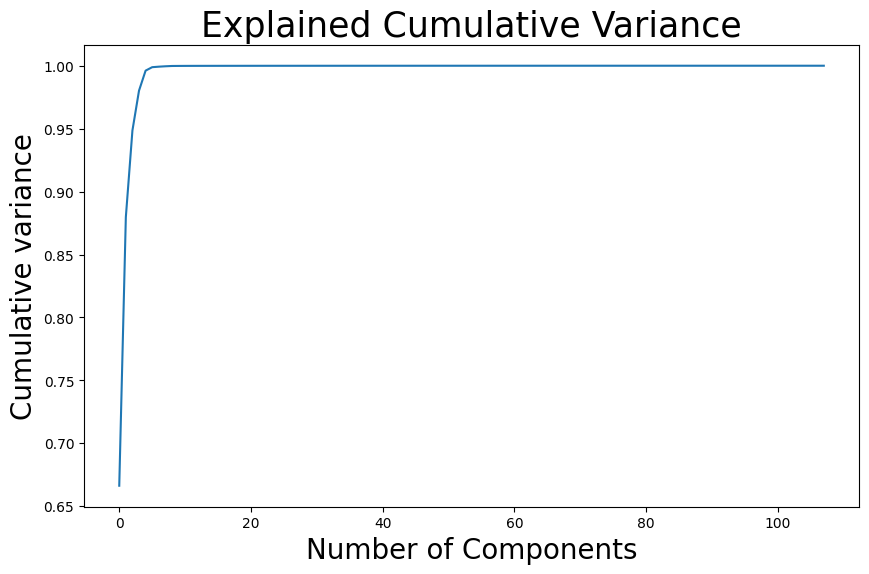

Number of components needed to explain 99.99% is 14


In [77]:
# Define principal component analysis
pca_calculator = PCA()

pca_calculator.fit(standardized_spectra)

# Get variance explained on every value
var_explained = pca_calculator.explained_variance_ratio_
cumvar_explained = np.cumsum(var_explained)


# Plot Explained Cumulative Variance
plt.figure(figsize=(10,6))

plt.plot(cumvar_explained, linestyle='-')
plt.xlabel('Number of Components', size = 20)
plt.ylabel('Cumulative variance', size = 20)
plt.title('Explained Cumulative Variance', size = 25)
plt.savefig('Q1_c_cumvar.png') 

plt.show()



# get the number of values that explain 99.99% of the variance
min_cumvar_explained = len(cumvar_explained) - sum((cumvar_explained>=0.9999)*1) + 1

print("Number of components needed to explain 99.99% is", min_cumvar_explained)

In [96]:
standardized_spectra_transformed[:, :n0]

array([[-1.95028503e+01, -1.99249816e-01,  1.33635171e+01, ...,
         6.43256283e-02,  5.86126025e-02, -7.45575660e-02],
       [-7.54859804e+00, -9.50767935e+00,  2.54832159e+00, ...,
        -2.12529217e-02, -1.83764808e-02, -3.23537601e-02],
       [-1.47020490e+01, -4.59646395e+00,  4.76123021e+00, ...,
        -5.73852568e-02, -2.11137359e-02, -6.19583257e-02],
       ...,
       [ 1.09053491e+01, -4.80039588e-01, -1.87448778e+00, ...,
         5.65859154e-02, -3.16907186e-02,  1.65141108e-02],
       [ 5.50766977e+00,  1.12195744e+00, -4.83548014e+00, ...,
        -4.68111052e-02, -2.53625246e-02,  1.98750018e-02],
       [-8.62304775e-01,  1.55881174e+01, -7.98105563e+00, ...,
        -4.02568685e-02, -1.79240444e-02, -7.53811703e-02]])

In [100]:
Simplified_data

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,198
103,3.104133,3.108319,3.112810,3.103635,3.104009,3.109472,3.115326,3.129190,3.158130,3.179469,...,-1.256754,-1.803342,-2.407039,-2.969741,-3.349612,-3.587217,-3.661899,-3.679781,-3.650872,-3.565990
21,1.054762,1.135950,1.254004,1.313568,1.397278,1.442267,1.473926,1.478549,1.452593,1.376035,...,-3.018767,-2.955602,-2.685025,-2.402566,-1.986892,-1.488477,-1.073793,-0.713016,-0.439301,-0.129796
0,-1.327162,-1.306327,-1.242618,-1.205158,-1.201918,-1.145476,-1.148631,-1.092068,-1.079427,-1.070618,...,-1.557835,-1.452291,-1.315094,-1.008781,-0.662410,-0.356601,-0.017496,0.219206,0.483616,0.667670
13,0.298013,0.272829,0.250845,0.203522,0.185694,0.178493,0.168356,0.181419,0.190839,0.218681,...,1.695242,1.669626,1.641852,1.529062,1.333146,1.133733,0.866093,0.668226,0.500377,0.330047
8,0.486984,0.451306,0.424248,0.390689,0.362780,0.350758,0.343481,0.351102,0.366708,0.395211,...,1.847635,1.849686,1.788399,1.662878,1.453871,1.205448,0.984026,0.753389,0.586840,0.420044
73,0.489560,0.533629,0.557632,0.585464,0.606173,0.650245,0.610626,0.552051,0.533444,0.511258,...,-0.996256,-0.766704,-0.630069,-0.470124,-0.197418,-0.043878,0.211725,0.433170,0.444316,0.525244
0,-1.327162,-1.306327,-1.242618,-1.205158,-1.201918,-1.145476,-1.148631,-1.092068,-1.079427,-1.070618,...,-1.557835,-1.452291,-1.315094,-1.008781,-0.662410,-0.356601,-0.017496,0.219206,0.483616,0.667670
17,3.053257,3.050578,3.051179,3.032574,3.025607,3.026396,3.016567,3.036306,3.043162,3.057260,...,0.282076,-0.038125,-0.418944,-0.812555,-1.151430,-1.436274,-1.628388,-1.775493,-1.856686,-1.910092
49,-1.052860,-1.056561,-1.083362,-1.084815,-1.082017,-1.089509,-1.120137,-1.101340,-1.099367,-1.070694,...,0.793654,0.833950,0.813305,0.757927,0.768233,0.692901,0.579473,0.509986,0.435825,0.404077
102,0.032568,0.037884,0.083079,0.087856,0.118800,0.093241,0.110276,0.116559,0.099323,0.083349,...,-0.554270,-0.525843,-0.535365,-0.534139,-0.510188,-0.438702,-0.406000,-0.337046,-0.322933,-0.289261


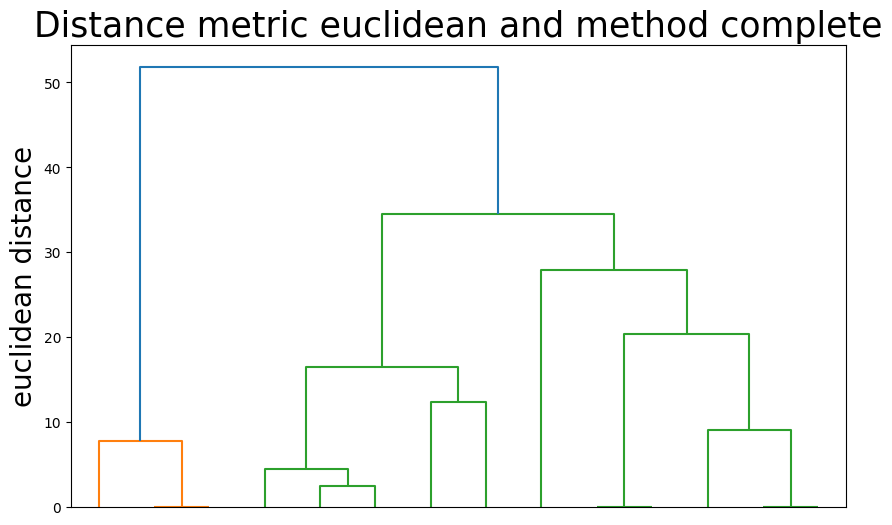

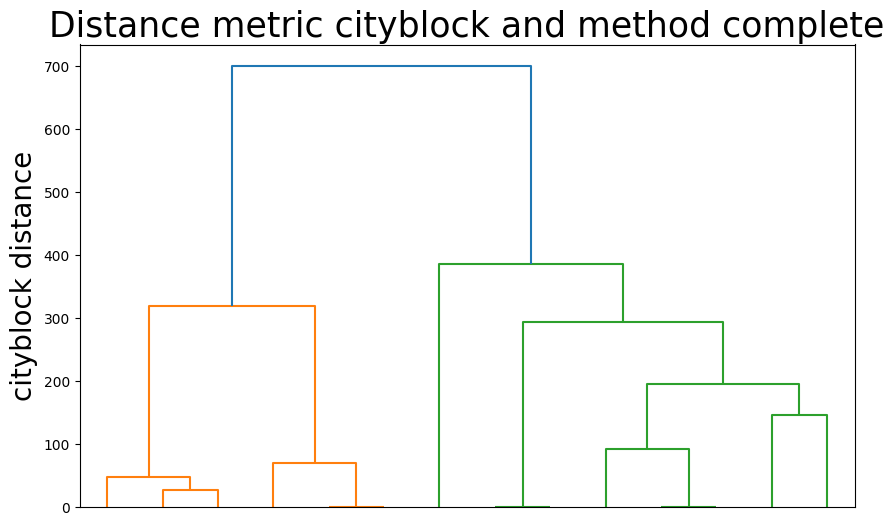

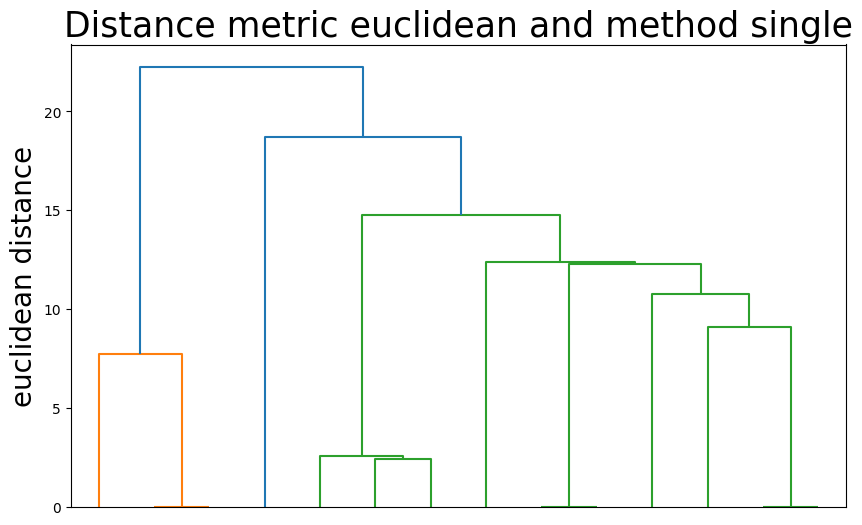

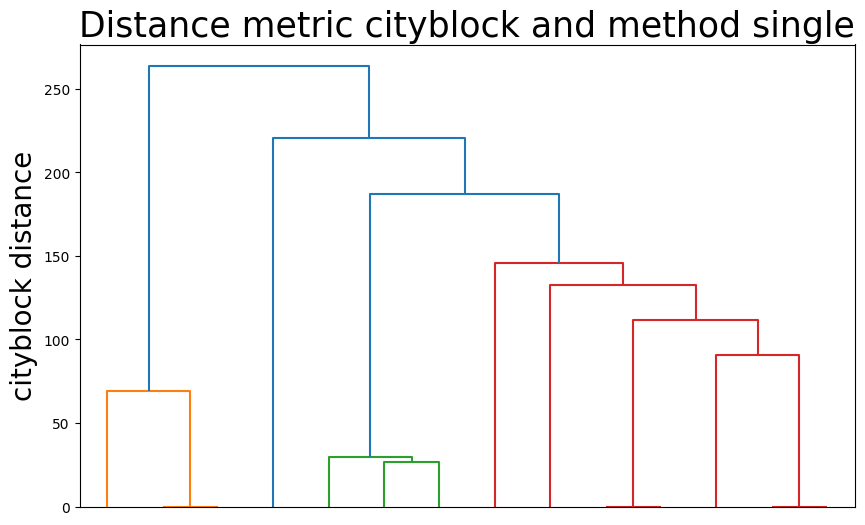

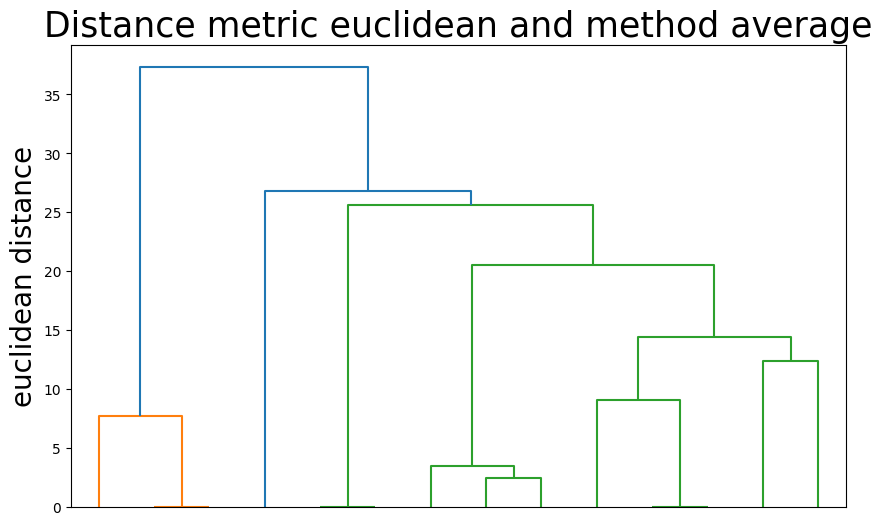

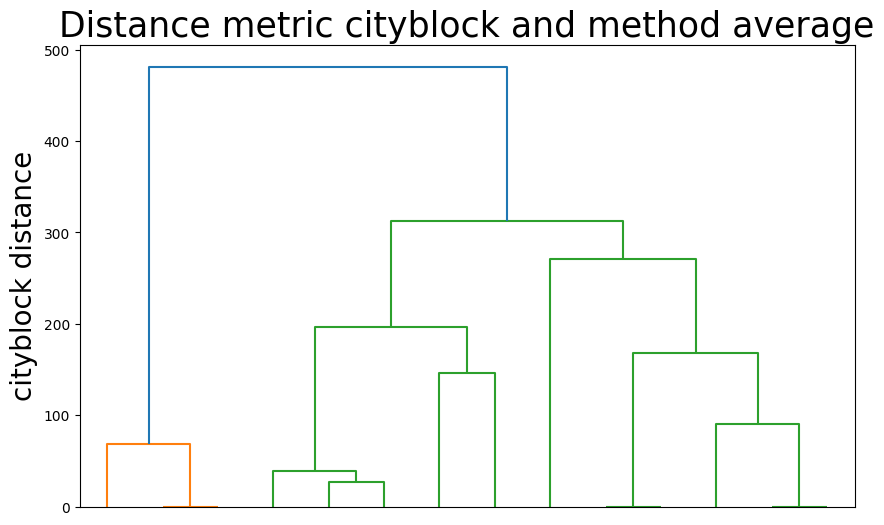

In [101]:


# Define the metrics and methods used
Metrics = ["euclidean", "cityblock"]
Methods = ["complete", "single", "average"]

# Change data so that it's ordered my explained variance
standardized_spectra_transformed = pca.transform(standardized_spectra)

# get indices of max scores
max_scores_indices = np.argmax(standardized_spectra_transformed[:, :n0], axis=0)

# Create reduced data set
Simplified_data = standardized_spectra.iloc[max_scores_indices]

# Plot all hierarchical clusters
for method in Methods:
    for metric in Metrics:
        fig, axes = plt.subplots(figsize=(10, 6))  
        linkage_data = linkage(Simplified_data, method=method, metric=metric)
        dendrogram(linkage_data, ax=axes)
        axes.set_xticklabels([])
        axes.set_title(f"Distance metric {metric} and method {method}", size=25)
        axes.set_ylabel(f'{metric} distance', size=20) 
        fig.savefig(f"Q1c_{method}_{metric}.png", dpi=600)

In [114]:
# Print mean values for different data sets
print(temperatures.mean(),components.mean())
print(temperatures.loc[Simplified_data.index].mean()
      ,components.loc[Simplified_data.index].mean())

0    49.734722
dtype: float64 0    0.332811
1    0.333156
2    0.334033
dtype: float64
0    42.873571
dtype: float64 0    0.344916
1    0.392625
2    0.262459
dtype: float64


In [115]:
n=4
linkage_data = linkage(Simplified_data, method='complete', metric='euclidean')
cluster_labels = fcluster(linkage_data, t=n, criterion='maxclust')  

for i in range(1,n+1):
    components_values = components.iloc[Simplified_data.index[cluster_labels==i]].mean()
    print(f"Group {i}")
    print("Water Mean", components_values[0])
    print("Ethanol Mean", components_values[1])
    print("2-propanol Mean", components_values[2])
    print("Temperatures Mean",temperatures.iloc[Simplified_data.index[cluster_labels==i]].mean())
    print('-----------------------------------------------------------------')

Group 1
Water Mean 0.0
Ethanol Mean 1.0
2-propanol Mean 0.0
Temperatures Mean 0    43.346667
dtype: float64
-----------------------------------------------------------------
Group 2
Water Mean 0.232408978
Ethanol Mean 0.4993491884
2-propanol Mean 0.2682418338
Temperatures Mean 0    42.01
dtype: float64
-----------------------------------------------------------------
Group 3
Water Mean 0.7333565651999999
Ethanol Mean 0.0
2-propanol Mean 0.2666434348
Temperatures Mean 0    46.028
dtype: float64
-----------------------------------------------------------------
Group 4
Water Mean 0.0
Ethanol Mean 0.0
2-propanol Mean 1.0
Temperatures Mean 0    30.0
dtype: float64
-----------------------------------------------------------------


In [116]:
linkage_data = linkage(Simplified_data, method='average', metric='cityblock')
cluster_labels = fcluster(linkage_data, t=n, criterion='maxclust')  

for i in range(1,n+1):
    components_values = components.iloc[Simplified_data.index[cluster_labels==i]].mean()
    print(f"Group {i}")
    print("Water Mean", components_values[0])
    print("Ethanol Mean", components_values[1])
    print("2-propanol Mean", components_values[2])
    print("Temperatures Mean",temperatures.iloc[Simplified_data.index[cluster_labels==i]].mean())
    print('-----------------------------------------------------------------')

Group 1
Water Mean 0.0
Ethanol Mean 1.0
2-propanol Mean 0.0
Temperatures Mean 0    43.346667
dtype: float64
-----------------------------------------------------------------
Group 2
Water Mean 0.232408978
Ethanol Mean 0.4993491884
2-propanol Mean 0.2682418338
Temperatures Mean 0    42.01
dtype: float64
-----------------------------------------------------------------
Group 3
Water Mean 0.7333565651999999
Ethanol Mean 0.0
2-propanol Mean 0.2666434348
Temperatures Mean 0    46.028
dtype: float64
-----------------------------------------------------------------
Group 4
Water Mean 0.0
Ethanol Mean 0.0
2-propanol Mean 1.0
Temperatures Mean 0    30.0
dtype: float64
-----------------------------------------------------------------


## part 2

### Part 1

In [123]:
seed_value = 2524541
n=40
components_sampled = components.sample(n=n, random_state=seed_value)
index = components_sampled.index

In [124]:
spectra_noisy_sampled = spectra.iloc[index]
temperatures_sampled = temperatures.iloc[index]
components_sampled = components.iloc[index]

In [125]:
np.random.seed(seed)

num_rows = 40
num_columns = 199
num_data_points = num_rows * num_columns
random_data = np.random.normal(scale=np.sqrt(0.0025), size=spectra_noisy_sampled.shape)
spectra_noisy_sampled += random_data

In [126]:
np.random.seed(seed)
NaN_index = np.array([True]*int(num_data_points * .8) + [False]*int(num_data_points * .2))
np.random.shuffle(NaN_index)
NaN_index = NaN_index.reshape(spectra_noisy_sampled.shape)

spectra_noisy_sampled[NaN_index] = np.nan


C:\Users\brian\AppData\Local\Temp\ipykernel_33112\2390561819.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spectra_noisy_sampled[NaN_index] = np.nan
C:\Users\brian\AppData\Local\Temp\ipykernel_33112\2390561819.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spectra_noisy_sampled[NaN_index] = np.nan


## Part 2

In [117]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Matern, ExpSineSquared

In [151]:
nan_per_row = spectra_noisy_sampled.isna().mean(axis=1)
nan_min_row = nan_per_row.idxmin()
min_na_value_sample = spectra_noisy_sampled.loc[nan_min_row]
X = np.arange(1,200)[min_na_value_sample.notna()].reshape(-1, 1)
y = min_na_value_sample.to_numpy()[min_na_value_sample.notna()]


In [132]:
def k_fold_cross_validation(kernel, X=X, y=y, k = 5, seed = seed):
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    kf = KFold(n_splits=k, shuffle=True, random_state=seed)
    mse = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        gp.fit(X_train, y_train)
        y_pred = gp.predict(X_test, return_std=False)
        mse.append(mean_squared_error(y_test, y_pred))
    return mse

In [149]:
# Define the k-fold cross validation
def k_fold_cross_validation(kernel, X=X, y=y, k=3, seed=seed):
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    K_Fold = KFold(n_splits=k, shuffle=True, random_state=seed)
    mse = cross_val_score(gp, X, y, cv=K_Fold, scoring='neg_mean_squared_error')
    return -mse

In [152]:
# Use k-fold validations to see which kernel creates the best scores
mses = []

kernel = Matern() + RBF() + WhiteKernel()
mses.append(k_fold_cross_validation(kernel=kernel, X=X, y=y, k = 3, seed = seed))

kernel = Matern() + RBF() 
mses.append(k_fold_cross_validation(kernel=kernel, X=X, y=y, k = 3, seed = seed))

kernel = Matern()
mses.append(k_fold_cross_validation(kernel=kernel, X=X, y=y, k = 3, seed = seed))

kernel = ExpSineSquared() +  Matern() + RBF() 
mses.append(k_fold_cross_validation(kernel=kernel, X=X, y=y, k = 3, seed = seed))

kernel = RBF() 
mses.append(k_fold_cross_validation(kernel=kernel, X=X, y=y, k = 3, seed = seed))

C:\Users\brian\abcdefg\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\brian\abcdefg\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__periodicity is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


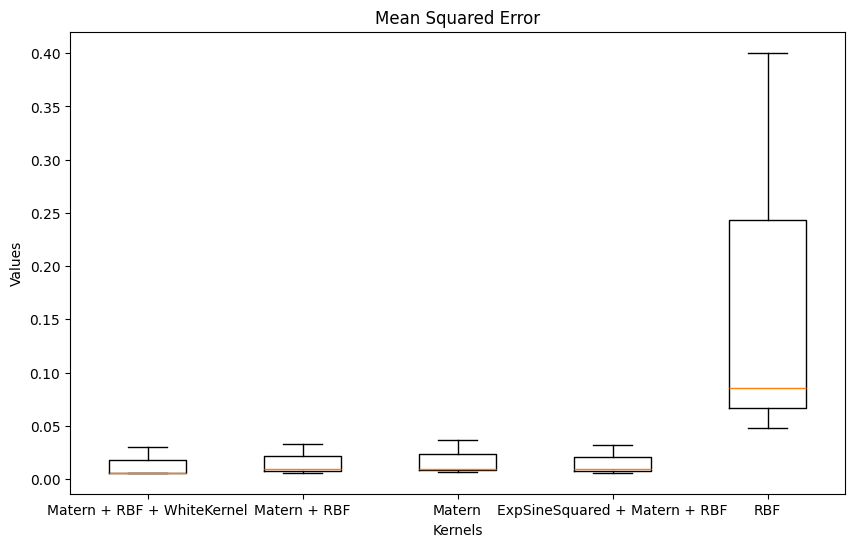

In [153]:
# Name of each combinations
knames = ["Matern + RBF + WhiteKernel","Matern + RBF",
    "Matern","ExpSineSquared + Matern + RBF","RBF"]
# Plot boxplots of the
plt.figure(figsize=(10, 6))
plt.boxplot(mses, labels=knames)
plt.title("Mean Squared Error")
plt.xlabel("Kernels")
plt.ylabel("Values")
plt.savefig("Question_1_part_2a_boxplot.png", dpi=600)
plt.show()

In [157]:
# Find the smallest MSE and the kernel combinations
mse = [np.mean(mse) for mse in mses]

print("The smallest MSE is with kernel combination",knames[np.argmin(mse)])

print("The smallest MSE is",np.min(mse))


The smallest MSE is with kernel combination Matern + RBF + WhiteKernel
The smallest MSE is 0.013955358080988826


In [158]:
# All wave lengths
X_long = np.linspace(0,199,200).reshape(-1,1)
# Kernel with lowest k-fold cross validation
kernel = Matern() + RBF() + WhiteKernel()
# fit GaussianProcess
gp = GaussianProcessRegressor(kernel=kernel, alpha=5e-10)
gp.fit(X, y)
#Calculate the prediction for i*
y_pred_train = gp.predict(X, return_std=False)
#Calculate the prediction for every wavelength
y_pred_long, sigma = gp.predict(X_long, return_std=True)

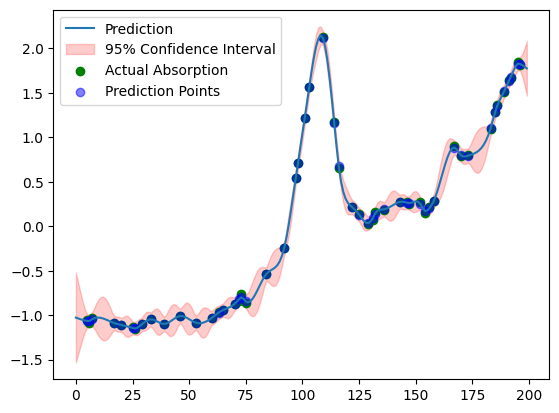

In [159]:
# Plot the results with  the confidence intervals
plt.plot(X_long, y_pred_long, label='Prediction')
plt.fill_between(X_long.squeeze(),y_pred_long - sigma * 1.96,y_pred_long + sigma * 1.96,color='red',
                 alpha=0.2,label='95% Confidence Interval')
plt.scatter(X, y, color='green', label='Actual Absorption')
plt.scatter(X, y_pred_train, color='blue', label='Prediction Points',alpha = 0.5)
plt.legend()
# Adding labels and legend
plt.savefig("Question_1_part_2a_predictions.png", dpi=600)
plt.show()

## Part 3

## Part 2.2

In [141]:
filtered_spectra = spectra_noisy_sampled.drop(index=nan_min_row)
filtered_components = components_sampled.drop(index=nan_min_row)
filtered_temperatures = temperatures_sampled.drop(index=nan_min_row)

spectra_star = spectra_noisy_sampled.loc[nan_min_row]
components_star = components_sampled.iloc[nan_min_row].to_frame().T
temperatures_star = temperatures_sampled.loc[nan_min_row]

In [164]:
# Create data frame fit for gaussian regression
spectra_longer = pd.DataFrame({'Column': np.repeat(np.arange(0, 199), 39)})
components_longer = pd.concat([filtered_components] * 199, ignore_index=True)
temperatures_longer = pd.concat([filtered_temperatures] * 199, ignore_index=True)
y = filtered_spectra.values.flatten(order='F')
X = pd.concat([temperatures_longer,components_longer,spectra_longer],axis=1)

# Create data frame fit for gaussian regression

spectra_longer = pd.DataFrame({'1': np.repeat(np.arange(0, 199), 1)})
components_star = pd.concat([components_star] * 199, ignore_index=True)
temperatures_star = pd.concat([temperatures_star] * 199, ignore_index=True)
y_star = spectra_star.values.flatten(order='F')
X_star = pd.concat([temperatures_star,components_star,spectra_longer],axis=1)

In [165]:
# remove na values
indices = np.where(~np.isnan(y))[0]
y = y[indices]
X = X.iloc[indices,:].to_numpy()

# remove na values
indices = np.where(~np.isnan(y_star))[0]
y_star = y_star[indices]
X_star = X_star.iloc[indices,:].to_numpy()

In [166]:
mses = []

kernel = Matern() + RBF() + WhiteKernel()
mses.append(k_fold_cross_validation(kernel=kernel, X=X, y=y, k = 3, seed = seed))

kernel = Matern() + RBF() 
mses.append(k_fold_cross_validation(kernel=kernel, X=X, y=y, k = 3, seed = seed))

kernel = Matern()
mses.append(k_fold_cross_validation(kernel=kernel, X=X, y=y, k = 3, seed = seed))

kernel = ExpSineSquared() +  Matern() + RBF() 
mses.append(k_fold_cross_validation(kernel=kernel, X=X, y=y, k = 3, seed = seed))

kernel = RBF() 
mses.append(k_fold_cross_validation(kernel=kernel, X=X, y=y, k = 3, seed = seed))

C:\Users\brian\abcdefg\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\brian\abcdefg\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


In [168]:
# Find the smallest MSE and the kernel combinations
mse = [np.mean(mse) for mse in mses]

print("The smallest MSE is with kernel combination",knames[np.argmin(mse)])

print("The smallest MSE is",np.min(mse))


The smallest MSE is with kernel combination Matern + RBF + WhiteKernel
The smallest MSE is 0.008021177004698414


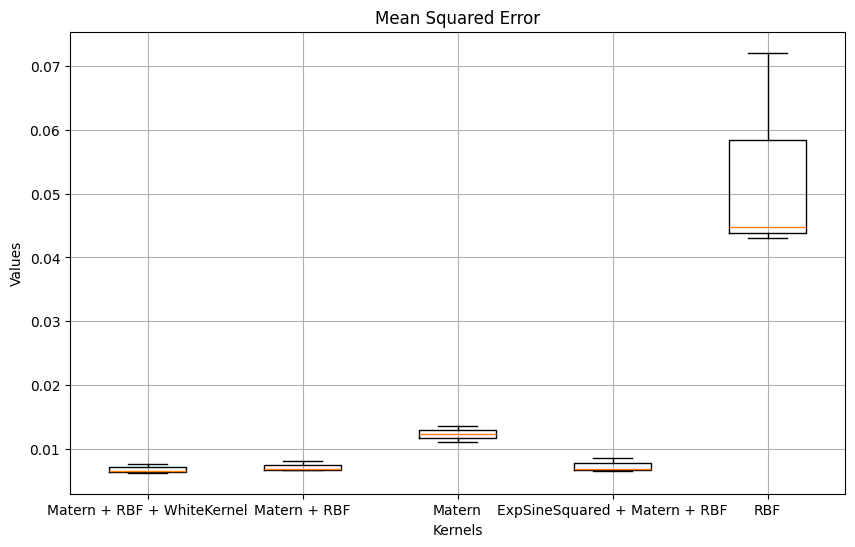

In [147]:
knames = ["Matern + RBF + WhiteKernel","Matern + RBF",
    "Matern","ExpSineSquared + Matern + RBF","RBF"]
plt.figure(figsize=(10, 6))
plt.boxplot(mses, labels=knames)
plt.title("Mean Squared Error")
plt.xlabel("Kernels")
plt.ylabel("Values")
plt.grid(True)
plt.savefig("Question_1_part_2b_boxplot.png", dpi=600)
plt.show()

In [227]:

# Kernel
kernel = Matern() + RBF() + WhiteKernel()
# fit GP
gp_regressor = GaussianProcessRegressor(kernel=kernel, alpha=5e-10)

gp_regressor.fit(X, y)

y_pred_star, sigma = gp_regressor.predict(X_star, return_std=True)


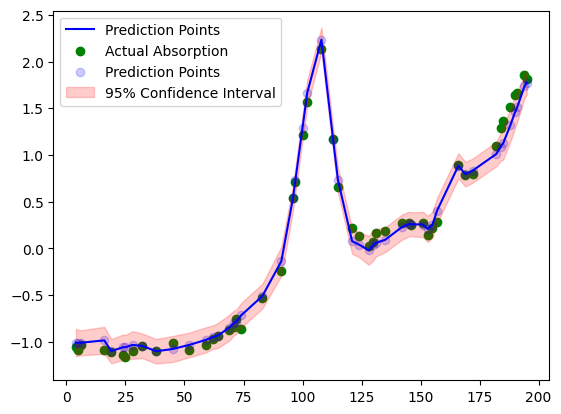

In [228]:
plt.plot(X_star[:,4], y_pred_star, color='blue', label='Prediction Points')
plt.scatter(X_star[:,4], y_star, color='green', label='Actual Absorption')
plt.scatter(X_star[:,4], y_pred_star, color='blue', label='Prediction Points',alpha = 0.2)
plt.fill_between(X_star[:, 4], y_pred_star - sigma * 1.96, y_pred_star + sigma * 1.96, color='red', 
                 alpha=0.2, 
                 label='95% Confidence Interval')
plt.legend()
plt.savefig("Question_1_part_2b_predictions.png", dpi=600)
plt.show()

In [203]:
mse = mean_squared_error(y_star, y_pred_star)
print("The mean squared error is",mse)

The mean squared error is 0.00790516057182307


## Part 3

In [182]:
# Create data frame fit for gaussian regression
spectra_longer = pd.DataFrame({'Column': np.repeat(np.arange(0, 199), 40)})
components_longer = pd.concat([components_sampled] * 199, ignore_index=True)
temperatures_longer = pd.concat([temperatures_sampled] * 199, ignore_index=True)
y = spectra_noisy_sampled.values.flatten(order='F')
X = pd.concat([temperatures_longer,components_longer,spectra_longer]
              ,axis=1)

In [183]:
# remove na values
indices = np.where(~np.isnan(y))[0]
y = y[indices]
X = X.iloc[indices,:].to_numpy()

In [171]:
kernel = RBF() +  WhiteKernel() + Matern()
gp_regressor = GaussianProcessRegressor(kernel=kernel)
gp_regressor.fit(X, y)

GaussianProcessRegressor(kernel=RBF(length_scale=1) + WhiteKernel(noise_level=1) + Matern(length_scale=1, nu=1.5))

In [172]:
components_test = pd.read_csv('components_test.csv',header = None, sep = ' ')
spectra_test = pd.read_csv('spectra_test.csv',header=None, sep = ' ')
temperatures_test = pd.read_csv('temperatures_test.csv',header=None)

In [174]:
n = 100
min_temperatures = np.min(temperatures)
max_temperatures = np.max(temperatures)
temperature_grid = np.linspace(min_temperatures, max_temperatures, n) 

# Temperatures

In [175]:
spectra_longer_test = pd.DataFrame({'Column': np.arange(0, 199)})
components_longer_test = pd.concat([components_test.loc[0].to_frame().transpose()] * 199
                                   , ignore_index=True)

one_d_array = spectra_test.iloc[0].values.flatten(order='F')
y_test_1 = pd.DataFrame({'y': one_d_array}).to_numpy().squeeze()
X_test_1 = pd.concat([components_longer_test,spectra_longer_test],axis=1).to_numpy()



In [185]:
nlpd_mean = []
for i in range(n):
    
    constant_column = np.full((X_test_1.shape[0], 1), temperature_grid[i])
    
    X_test_np = np.hstack((constant_column, X_test_1))
    
    y_pred, sigma = gp_regressor.predict(X_test_np, return_std=True)
    nlpd = -np.log(sigma * np.sqrt(2 * np.pi)) - 0.5 * (((y_pred - y_test_1) ** 2) / (sigma**2))
    nlpd_mean.append(-nlpd.mean())


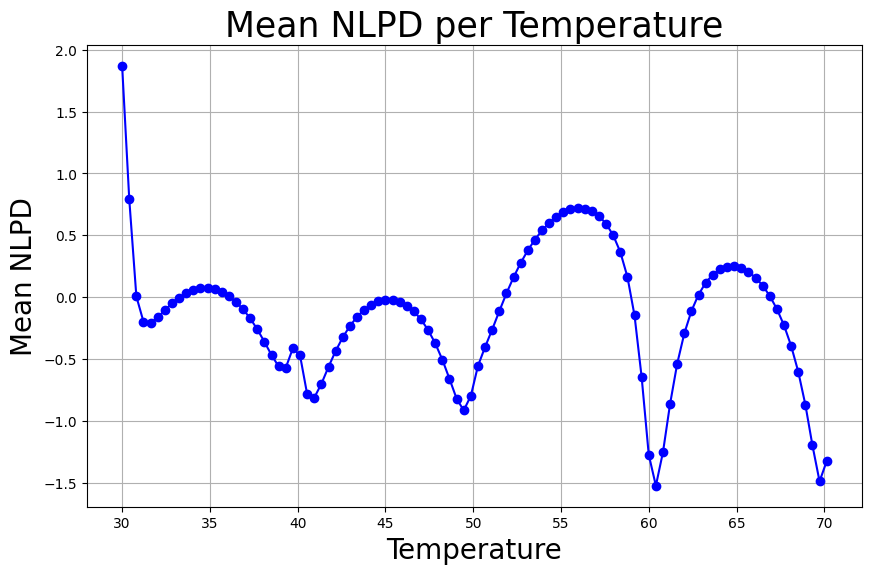

In [177]:
plt.figure(figsize=(10, 6)) 
plt.plot(temperature_grid, nlpd_mean, marker='o', linestyle='-', color='blue') 
plt.title('Mean NLPD per Temperature', fontsize=25) 
plt.xlabel('Temperature', fontsize=20)
plt.ylabel('Mean NLPD', fontsize=20) 
plt.savefig("Question_1_part_2c_tempatures.png", dpi=600)
plt.grid(True)  

plt.show()

In [178]:
print("Minimum value for nlpd mean is when the temperature is", temperature_grid[np.argmin(nlpd_mean)])

Minimum value for nlpd mean is when the temperature is 60.40151515151515


# Components

In [353]:
import itertools

n = 10
numbers = np.linspace(0, 1, n)

components_combinations = itertools.product(numbers, repeat=3)

components_combinations = np.array(list(components_combinations))

In [351]:
spectra_longer_test = pd.DataFrame({'Column': np.arange(0, 199)}).to_numpy()
temperatures_longer_test = np.repeat([temperatures_test[0][1]],199).reshape(199,1)
one_d_array = spectra_test.iloc[1].values.flatten(order='F')
y_test_1 = pd.DataFrame({'y': one_d_array}).to_numpy().squeeze()
X_test_1 = np.hstack([temperatures_longer_test,spectra_longer_test])

In [354]:
nlpd_mean = []
for i in range(components_combinations.shape[0]):
    constant_column = np.full((X_test_1.shape[0], 3), components_combinations[i])
    X_test_np = np.hstack((X_test_1[:,[0]],constant_column, X_test_1[:,[1]]))
    y_pred, sigma = gp_regressor.predict(X_test_np, return_std=True)
    nlpd=np.log(sigma * np.sqrt(2 * np.pi)) + 0.5 * ((y_pred - y_test_1) ** 2) / sigma**2
    nlpd_mean.append(np.mean(nlpd))

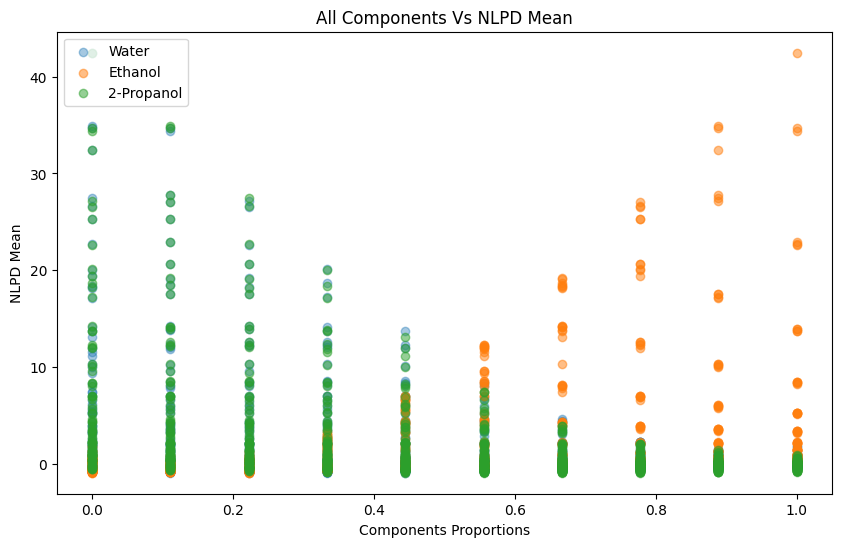

In [355]:
plt.figure(figsize=(10, 6))
plt.scatter(components_combinations[:, 0], nlpd_mean, label='Water', alpha=.4)
plt.scatter(components_combinations[:, 1], nlpd_mean, label='Ethanol', alpha=0.5)
plt.scatter(components_combinations[:, 2], nlpd_mean, label='2-Propanol', alpha=.5)

plt.title('All Components Vs NLPD Mean')
plt.xlabel('Components Proportions')
plt.ylabel('NLPD Mean')
plt.legend(loc = 'upper left')
plt.savefig("Question_1_part_2_4b_NLPD.png", dpi=600)
plt.show()

In [356]:
print("Minimum value for nlpd mean is when the componts are", components_combinations[np.argmin(nlpd_mean)])

Minimum value for nlpd mean is when the componts are [0.11111111 0.         0.55555556]


# Question 2


In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('02524541.csv')
y = data.y.to_numpy()
X = data.iloc[:, 1:].to_numpy()

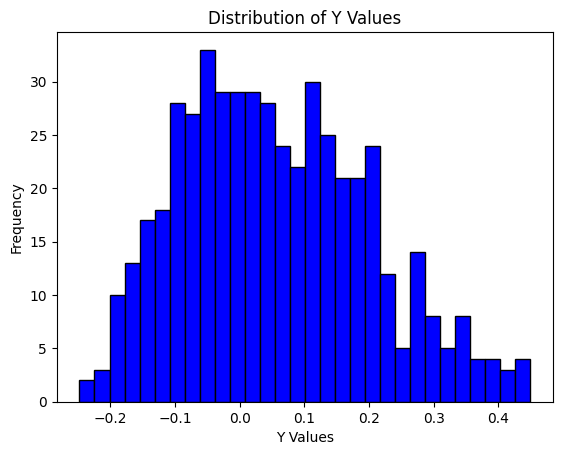

In [194]:


plt.hist(y, bins=30, color='blue', edgecolor='black')
plt.title("Distribution of Y Values") 
plt.xlabel("Y Values") 
plt.ylabel("Frequency")  


plt.savefig('Q2_y_hist.png', dpi=600, format='png', bbox_inches='tight')

plt.show()  

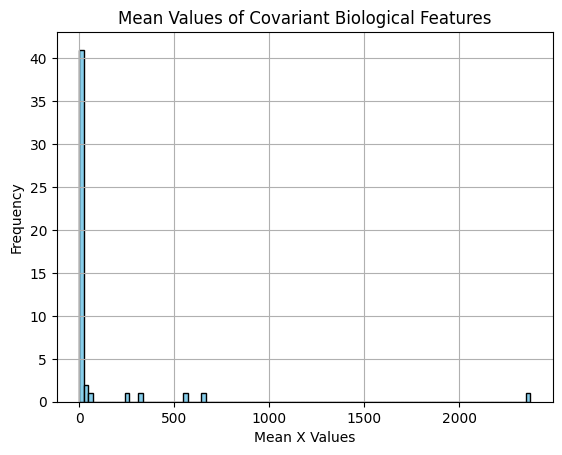

In [12]:
plt.hist(data.iloc[:, 1:].mean(), bins=100, color='blue', edgecolor='black')
plt.title("Mean Values of Covariant Biological Features")  # Add a title to the histogram
plt.xlabel("Mean X Values")  # Add an x-axis label
plt.ylabel("Frequency")  # Add a y-axis label
plt.grid(True)  # Display grid lines for better readability

# Save the figure in high resolution
plt.savefig('Q2_y_hist.png', dpi=600, format='png', bbox_inches='tight')

plt.show()  # Show the plot as usual

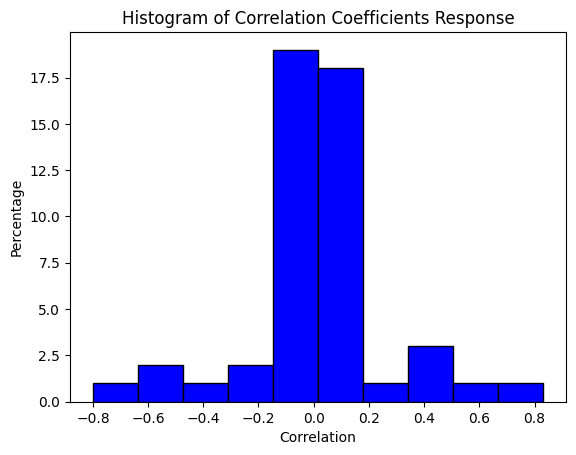

In [200]:
correlations = data.corr()['y'].drop('y') 
plt.hist(correlations, bins=10, color='blue', edgecolor='black')  
plt.title("Histogram of Correlation Coefficients Response")  
plt.xlabel('Correlation') 
plt.ylabel('Percentage')  
plt.savefig('Q2.1_correlation_histogram.png', dpi=600, format='png', bbox_inches='tight')
plt.show()

The outputs y are all between 0.5 and -0.3 but are more centred around the value 0. There are 49 covariates between them.

In [345]:
X_train.shape

(350, 49)

## Part 2 b

In [7]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=seed, test_size=0.3,  
                                                   shuffle=True) 

correlations = data.corr()['y'].drop('y') 
low_corr_columns = correlations[abs(correlations) < 0.2].index
filtered_data = data.drop(columns=low_corr_columns)
X_filtered = filtered_data.iloc[:, 1:].to_numpy()
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered= train_test_split(X_filtered,y, 
                                   random_state=seed,  
                                   test_size=0.3,  
                                   shuffle=True) 
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

## Random Forest

In [205]:
from sklearn.ensemble import RandomForestRegressor

In [243]:
##Random Forest output 1
model_comp = []
model = RandomForestRegressor(n_estimators=100, random_state=seed)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
model_comp.append(-cross_val_scores)
print("n=100",np.mean(-cross_val_scores))


model = RandomForestRegressor(n_estimators=350, random_state=seed)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print("n=350",np.mean(-cross_val_scores))
model_comp.append(-cross_val_scores)


model = RandomForestRegressor(n_estimators=500, random_state=seed)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print("n=500",np.mean(-cross_val_scores))
model_comp.append(-cross_val_scores)


model = RandomForestRegressor(n_estimators=1000, random_state=seed)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print("n=1000",np.mean(-cross_val_scores))
model_comp.append(-cross_val_scores)

n=100 0.00481468320232086
n=350 0.004742059696482516
n=500 0.004714046515808655
n=1000 0.004705996929711825


In [244]:
##Random Forest output 1
model_comp_filtered = []
model = RandomForestRegressor(n_estimators=100, random_state=seed)
cross_val_scores = cross_val_score(model, X_train_filtered, y_train, cv=kf, scoring='neg_mean_squared_error')
model_comp_filtered.append(-cross_val_scores)
print("n=100",np.mean(-cross_val_scores))


model = RandomForestRegressor(n_estimators=350, random_state=seed)
cross_val_scores = cross_val_score(model, X_train_filtered, y_train, cv=kf, scoring='neg_mean_squared_error')
print("n=350",np.mean(-cross_val_scores))
model_comp_filtered.append(-cross_val_scores)


model = RandomForestRegressor(n_estimators=500, random_state=seed)
cross_val_scores = cross_val_score(model, X_train_filtered, y_train, cv=kf, scoring='neg_mean_squared_error')
print("n=500",np.mean(-cross_val_scores))
model_comp_filtered.append(-cross_val_scores)


model = RandomForestRegressor(n_estimators=1000, random_state=seed)
cross_val_scores = cross_val_score(model, X_train_filtered, y_train, cv=kf, scoring='neg_mean_squared_error')
print("n=1000",np.mean(-cross_val_scores))
model_comp_filtered.append(-cross_val_scores)

n=100 0.004033088095108333
n=350 0.0040179406268539735
n=500 0.0040186281471173094
n=1000 0.004008328970420838


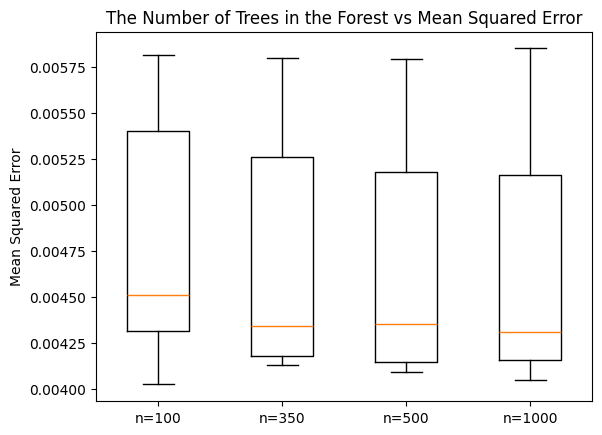

In [245]:
labels = ['n=100', 'n=350', 'n=500', 'n=1000']

plt.boxplot(model_comp, labels = labels, widths=0.5)

plt.ylabel('Mean Squared Error')

plt.title('The Number of Trees in the Forest vs Mean Squared Error')

plt.savefig('Random_Forest_output_1.png', dpi=600)

plt.show()


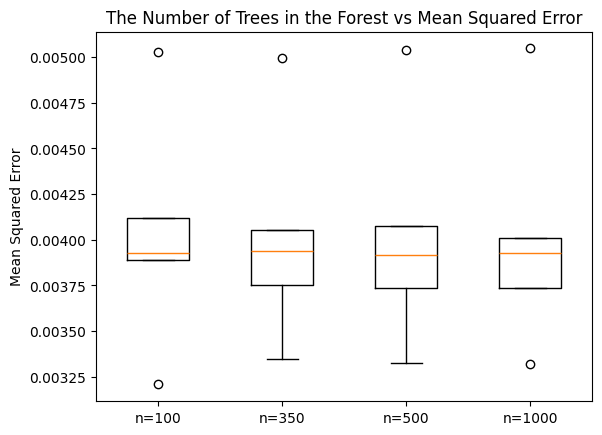

In [246]:
labels = ['n=100', 'n=350', 'n=500', 'n=1000']

plt.boxplot(model_comp_filtered, labels = labels, widths=0.5)

plt.ylabel('Mean Squared Error')

plt.title('The Number of Trees in the Forest vs Mean Squared Error')


plt.savefig('Random_Forest_filtered_output_1.png', dpi=600)

plt.show()


In [247]:
##Random Forest output 2
model_comp_filtered = []
n=500
model = RandomForestRegressor(n_estimators=n, random_state=seed, criterion='squared_error')
cross_val_scores = cross_val_score(model, X_train_filtered, y_train, cv=kf, scoring='neg_mean_squared_error')
model_comp_filtered.append(-cross_val_scores)
print("criterion='squared_error'",np.mean(-cross_val_scores))
model = RandomForestRegressor(n_estimators=n, random_state=seed, criterion='absolute_error')
cross_val_scores = cross_val_score(model, X_train_filtered, y_train, cv=kf, scoring='neg_mean_squared_error')
print("criterion='absolute_error'",np.mean(-cross_val_scores))
model_comp_filtered.append(-cross_val_scores)
model = RandomForestRegressor(n_estimators=n, random_state=seed, criterion='friedman_mse')
cross_val_scores = cross_val_score(model, X_train_filtered, y_train, cv=kf, scoring='neg_mean_squared_error')
print("criterion='friedman_mse'",np.mean(-cross_val_scores))
model_comp_filtered.append(-cross_val_scores)

criterion='squared_error' 0.0040186281471173094
criterion='absolute_error' 0.003978154910387713
criterion='friedman_mse' 0.00402030510179899


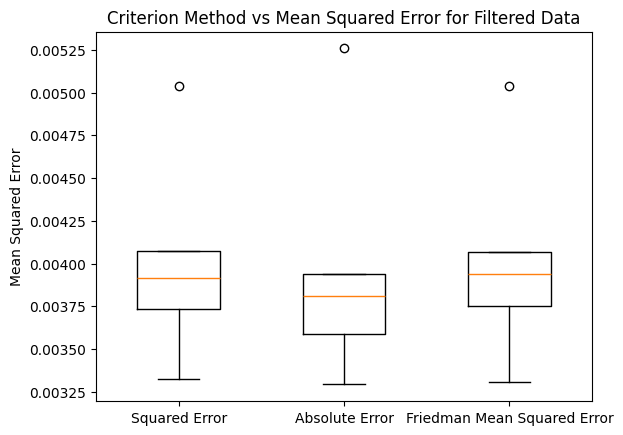

In [248]:
labels = ['Squared Error', 'Absolute Error', 'Friedman Mean Squared Error']

plt.boxplot(model_comp_filtered, labels = labels, widths=0.5)

plt.ylabel('Mean Squared Error')

plt.title('Criterion Method vs Mean Squared Error for Filtered Data')

plt.savefig('Random_Forest_filtered_output_2.png', dpi=600)

plt.show()

In [249]:
##Random Forest output 2
model_comp = []
n=500
model = RandomForestRegressor(n_estimators=n, random_state=seed, criterion='squared_error')
cross_val_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
model_comp.append(-cross_val_scores)
print("criterion='squared_error'",np.mean(-cross_val_scores))
model = RandomForestRegressor(n_estimators=n, random_state=seed, criterion='absolute_error')
cross_val_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print("criterion='absolute_error'",np.mean(-cross_val_scores))
model_comp.append(-cross_val_scores)
model = RandomForestRegressor(n_estimators=n, random_state=seed, criterion='friedman_mse')
cross_val_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print("criterion='friedman_mse'",np.mean(-cross_val_scores))
model_comp.append(-cross_val_scores)

criterion='squared_error' 0.004714046515808655
criterion='absolute_error' 0.004816763942707274
criterion='friedman_mse' 0.004731337837501728


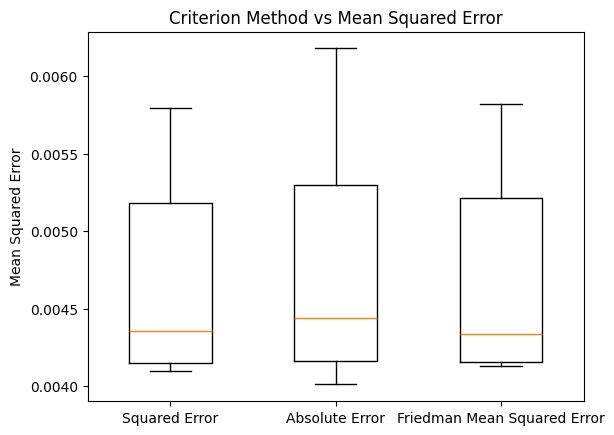

In [250]:
plt.boxplot(model_comp, widths=0.5, labels = labels)

plt.ylabel('Mean Squared Error')

plt.title('Criterion Method vs Mean Squared Error')

plt.savefig('Random_Forest_output_2.png', dpi=600)

plt.show()

## Kernal method

## Kernel shtuff

In [295]:
from sklearn.neighbors import KNeighborsRegressor

k_values = [3, 4, 5, 6, 7, 8]

mses = []
for k in k_values:
    KNN = KNeighborsRegressor(n_neighbors=k, metric='manhattan')
    mse = -cross_val_score(KNN, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mses.append(mse)
mses2 = [np.mean(mse) for mse in mses]

for i in range(len(k_values)):
    print(k_values[i], mses2[i])

print("Min K value", k_values[np.argmin(mses2)])


3 0.017649071375135966
4 0.01692996302881528
5 0.0165088686313185
6 0.015971793234317536
7 0.015786492083060027
8 0.015623145701236333
Min K value 8


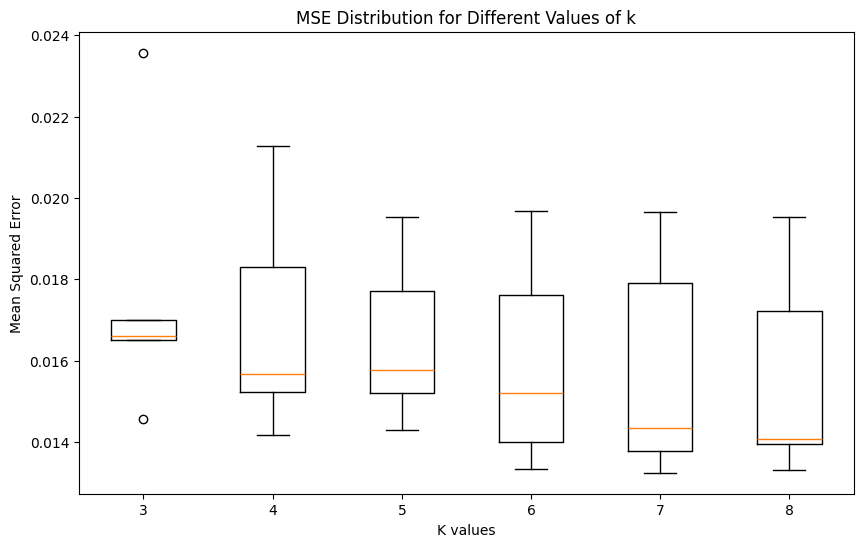

In [296]:
plt.figure(figsize=(10, 6))
plt.boxplot(mses, labels = k_values)
plt.xlabel('K values')
plt.ylabel('Mean Squared Error')
plt.title('MSE Distribution for Different Values of k')
plt.savefig('Knn_output1.png')
plt.show()

In [297]:

k_values = [3, 4, 5, 6, 7, 8]

mses = []
for k in k_values:
    KNN = KNeighborsRegressor(n_neighbors=k, metric='chebyshev')
    mse = -cross_val_score(KNN, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mses.append(np.mean(mse))
mses2 = [np.mean(mse) for mse in mses]

for i in range(len(k_values)):
    print(k_values[i], mses2[i])

print("Min K value", k_values[np.argmin(mses2)])

3 0.01865759270681509
4 0.017817155619584867
5 0.016922759071867157
6 0.01715656656296092
7 0.016728144684940556
8 0.01652702111153196
Min K value 8


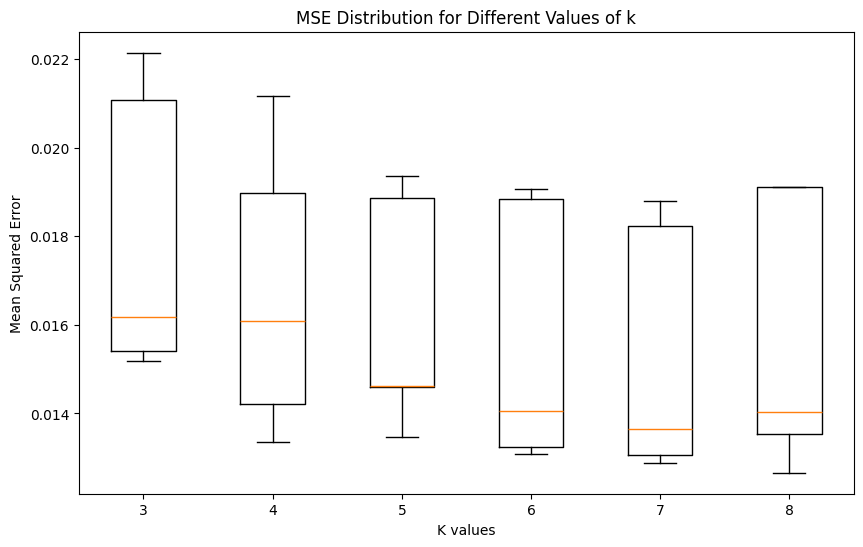

In [298]:
# Plot the box plots for MSEs
plt.figure(figsize=(10, 6))
plt.boxplot([mse_results[k] for k in k_values], labels=k_values)
plt.xlabel('K values')
plt.ylabel('Mean Squared Error')
plt.title('MSE Distribution for Different Values of k')
plt.savefig('Knn_output2.png', dpi = 600)
plt.show()

## Decision trees

In [310]:
from sklearn.tree import DecisionTreeRegressor

In [334]:
##Decision Tree output 1
mse_comp = []
model = DecisionTreeRegressor(random_state=seed,criterion='absolute_error'
                              ,splitter='best')
cross_val_scores = cross_val_score(model, X_train
                        , y_train, cv=kf, scoring='neg_mean_squared_error')
print("absolute_error",np.mean(-cross_val_scores))
mse_comp.append(-cross_val_scores)
model = DecisionTreeRegressor(random_state=seed,criterion='squared_error'
                              ,splitter='best')
cross_val_scores = cross_val_score(model, X_train
                        , y_train, cv=kf, scoring='neg_mean_squared_error')
print("squared_error",np.mean(-cross_val_scores))
mse_comp.append(-cross_val_scores)
model = DecisionTreeRegressor(random_state=seed,criterion='friedman_mse'
                              ,splitter='best')
cross_val_scores = cross_val_score(model, X_train
                                   , y_train, cv=kf, scoring='neg_mean_squared_error')
print("friedman_mse",np.mean(-cross_val_scores))
mse_comp.append(-cross_val_scores)

absolute_error 0.008125722277687028
squared_error 0.008830104897732692
friedman_mse 0.009035365961101676


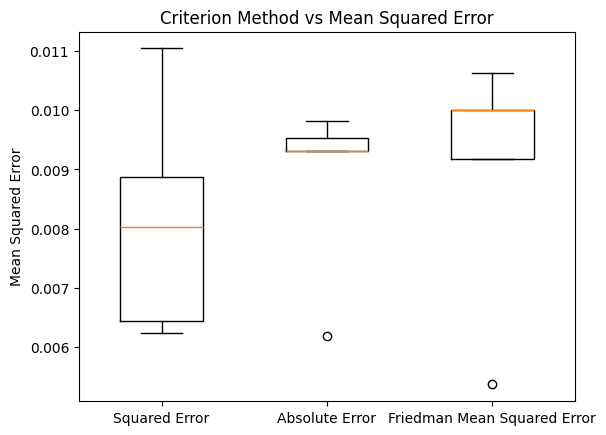

In [332]:
labels = ['Squared Error', 'Absolute Error', 'Friedman Mean Squared Error']

plt.boxplot(mse_comp, labels = labels, widths=0.5)

plt.ylabel('Mean Squared Error')

plt.title('Criterion Method vs Mean Squared Error')

plt.savefig('Decision_Tree_output_1.png', dpi=600, bbox_inches='tight')

plt.show()

In [333]:
##Decision Tree output 2
mse_comp = []
model = DecisionTreeRegressor(random_state=seed,criterion='absolute_error',splitter='best')
cross_val_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print("best",np.mean(-cross_val_scores))
mse_comp.append(-cross_val_scores)
model = DecisionTreeRegressor(random_state=seed,criterion='absolute_error',splitter='random')
cross_val_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print("random",np.mean(-cross_val_scores))
mse_comp.append(-cross_val_scores)

best 0.008125722277687028
random 0.011758628541753916


## Neural network

In [9]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import torch.nn.functional as F

In [26]:
X_train_nn = torch.tensor(X_train, dtype=torch.float32)
y_train_nn = torch.tensor(y_train, dtype=torch.float32)
train_data = TensorDataset(X_train_nn, y_train_nn)
train_data = DataLoader(dataset=train_data, batch_size=10, shuffle=True)

class Neural_Network(nn.Module):
    def __init__(self, dim):
        nn.Module.__init__(self)
        self.layer1 = nn.Linear(dim, 128)  
        self.layer2 = nn.Linear(128, 64)        
        self.layer3 = nn.Linear(64, 32)          
        self.layer4 = nn.Linear(32, 1)           

    def forward(self, x):
        x = F.relu(self.layer1(x))  
        x = F.relu(self.layer2(x))  
        x = self.layer4(F.relu(self.layer3(x)))
        return x

model = Neural_Network(49)

criterion = nn.MSELoss()

Adam = optim.Adam(model.parameters(), lr=0.001)

epochs = 1000

for epoch in range(epochs):
    for X_vals, y_vals in train_data:
        optimizer.zero_grad()
        y_pred = model(X_vals)
        loss = criterion(y_pred, y_vals)
        loss.backward()
        Adam.step()
    print(loss)

tensor(1532.4583, grad_fn=<MseLossBackward0>)
tensor(11.3348, grad_fn=<MseLossBackward0>)
tensor(1.6912, grad_fn=<MseLossBackward0>)
tensor(21.3213, grad_fn=<MseLossBackward0>)
tensor(0.6553, grad_fn=<MseLossBackward0>)
tensor(0.0315, grad_fn=<MseLossBackward0>)
tensor(0.0698, grad_fn=<MseLossBackward0>)
tensor(0.0450, grad_fn=<MseLossBackward0>)
tensor(0.0360, grad_fn=<MseLossBackward0>)
tensor(0.7402, grad_fn=<MseLossBackward0>)
tensor(0.0594, grad_fn=<MseLossBackward0>)
tensor(0.0467, grad_fn=<MseLossBackward0>)
tensor(0.0564, grad_fn=<MseLossBackward0>)
tensor(0.0144, grad_fn=<MseLossBackward0>)
tensor(0.0511, grad_fn=<MseLossBackward0>)
tensor(0.1388, grad_fn=<MseLossBackward0>)
tensor(0.0741, grad_fn=<MseLossBackward0>)
tensor(0.0166, grad_fn=<MseLossBackward0>)
tensor(0.0505, grad_fn=<MseLossBackward0>)
tensor(0.1050, grad_fn=<MseLossBackward0>)
tensor(0.0634, grad_fn=<MseLossBackward0>)
tensor(0.0281, grad_fn=<MseLossBackward0>)
tensor(0.0361, grad_fn=<MseLossBackward0>)
tensor

In [29]:
X_train_nn = torch.tensor(X_train, dtype=torch.float32)
y_train_nn = torch.tensor(y_train, dtype=torch.float32)
train_data = TensorDataset(X_train_nn, y_train_nn)
train_data = DataLoader(dataset=train_data, batch_size=10, shuffle=True)

class Neural_Network(nn.Module):
    def __init__(self, dim):
        nn.Module.__init__(self)
        self.layer1 = nn.Linear(dim, 128)  
        self.layer2 = nn.Linear(128, 64)        
        self.layer3 = nn.Linear(64, 1)          

    def forward(self, x):
        x = F.relu(self.layer1(x))  
        x = F.relu(self.layer2(x))  
        x = F.relu(self.layer3(x))
        return x

model = Neural_Network(49)

criterion = nn.MSELoss()

Adam = optim.Adam(model.parameters(), lr=0.001)

epochs = 1000

for epoch in range(epochs):
    for X_vals, y_vals in train_data:
        Adam.zero_grad()
        y_pred = model(X_vals)
        loss = criterion(y_pred, y_vals)
        loss.backward()
        Adam.step()
    print(loss)

tensor(0.0230, grad_fn=<MseLossBackward0>)
tensor(0.0164, grad_fn=<MseLossBackward0>)
tensor(0.0183, grad_fn=<MseLossBackward0>)
tensor(0.0152, grad_fn=<MseLossBackward0>)
tensor(0.0205, grad_fn=<MseLossBackward0>)
tensor(0.0278, grad_fn=<MseLossBackward0>)
tensor(0.0131, grad_fn=<MseLossBackward0>)
tensor(0.0423, grad_fn=<MseLossBackward0>)
tensor(0.0102, grad_fn=<MseLossBackward0>)
tensor(0.0517, grad_fn=<MseLossBackward0>)
tensor(0.0363, grad_fn=<MseLossBackward0>)
tensor(0.0400, grad_fn=<MseLossBackward0>)
tensor(0.0343, grad_fn=<MseLossBackward0>)
tensor(0.0055, grad_fn=<MseLossBackward0>)
tensor(0.0243, grad_fn=<MseLossBackward0>)
tensor(0.0248, grad_fn=<MseLossBackward0>)
tensor(0.0268, grad_fn=<MseLossBackward0>)
tensor(0.0241, grad_fn=<MseLossBackward0>)
tensor(0.0202, grad_fn=<MseLossBackward0>)
tensor(0.0134, grad_fn=<MseLossBackward0>)
tensor(0.0220, grad_fn=<MseLossBackward0>)
tensor(0.0098, grad_fn=<MseLossBackward0>)
tensor(0.0316, grad_fn=<MseLossBackward0>)
tensor(0.01

## Part 2.3

### Random Forest

In [348]:
rf = RandomForestRegressor(n_estimators=350, random_state=seed)

rf.fit(X_train_filtered, y_train_filtered)

y_pred = rf.predict(X_test_filtered)

mse = mean_squared_error(y_test_filtered, y_pred)

print("Mean Squared Error is",mse)

Mean Squared Error 0.002934480371983995


## Decision Tree

In [149]:
dt = DecisionTreeRegressor(random_state=seed)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error is",mse)

Mean Squared Error: 0.0060
R-squared: 0.6956


## Neural network

In [32]:
X_test_nn = torch.tensor(X_test, dtype=torch.float32)
y_test_nn = torch.tensor(y_test, dtype=torch.float32)
test_data = TensorDataset(X_test_nn, y_test_nn)
test_data = DataLoader(dataset=test_data, batch_size=10, shuffle=False)
loss_count = 0
count = 0
with torch.no_grad():  
    for X_vals, y_vals in test_data:
        y_pred = model(X_vals)
        loss = criterion(y_pred, y_vals)
        loss_count += loss.item()
        count +=1

mse = loss_count / count
print("Mean Squared Error is",mse)

Mean Squared Error is 0.021459207590669393


In [47]:
knn = KNeighborsRegressor(n_neighbors=7, metric='manhattan')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set", mse)

Mean Squared Error with best model: 0.015509671260645412
